## Assignment 2:
### Visualizing High Dimensional Data
#### Kendall Stauffer (U0688677)

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

## All Kmeans plots are at the bottom of the notebook in the question 3 section, final figure. I did this to make it easier to interpret the data.

### Question 1:
 - Implement PCA as a function and provide a commented version of it. Feel free to compute eigenvectors, eigenvalues etc. using numpy or other api functionality.
 - Plot (with a scatter plot) the iris dataset using your PCA implementation. Color each of the species differently. On a separate plot provide a scatter plot of the language api (sklearn) PCA for comparison.
 - Run K-Means on these results with k=2 and plot the results color according to cluster
 - Now create an alternate PCA function where you do not center the data. Using a scatter plot, show the results. Again, color each of the species differently.
 - What is the effect of neglecting to center the data? What type of data would not work well for PCA and why?
 

In [2]:
 def compute_PCA(data, centered = True):
        """
        Params data: A dataframe or array that contains the data for pca.
        Params centered: if set to True, data will be mean centered.
        Return: Returns a python dictionary that contains the calculated percent variance and decomposed values.
        """
        # if centered data = True do mean center scaling
        if centered:            
            # centering the data
            temp = pd.DataFrame(data.apply(lambda x: x-x.mean())).values
        else:
            # don't scale data
            temp = data.values
        # calculate covariance matrix
        cov = np.cov(temp.transpose())
        # calculate eigen vector and values
        values, vectors = np.linalg.eig(cov)
        # sort eigen values and vectofrom sklearn.preprocessing import StandardScalerrs by highest eigen value
        val_vec = list(tuple(zip(values, vectors)))
        val_vec.sort(reverse=True)
        # unpacking sorted eigen values
        temp_vals = [val_vec[i][0] for i in range(len(val_vec))]
        # calculate % variance for every value
        percent_variance = [np.round(((temp_vals[i]/sum(temp_vals))*100), 2) for i in range(len(temp_vals))]
        # unpacking sorted eigen vectors
        vectors_array = np.array([val_vec[i][1] for i in range(len(val_vec))])
        # taking the dot product of scaled data by eigenvetors transposed
        temp_pca = temp.dot(vectors_array[:, :])
        # making columnames
        col_names = [f"PC{i}" for i in range(temp_pca.shape[1])]
        # making a pandas dataframe
        temp_pca = pd.DataFrame(temp_pca, columns = col_names)
        # returning as a python dictionary that contains the percent variation and decomposed data.
        temp_final = {'percent_variance': percent_variance,
                     'pca': temp_pca}
        return temp_final       

In [3]:
# preparing data
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['classes'] = iris.target
df.classes = np.where(df.classes ==  0, iris.target_names[0], df.classes)
df.classes = np.where(df.classes ==  '1', iris.target_names[1], df.classes)
df.classes = np.where(df.classes ==  '2', iris.target_names[2], df.classes)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  classes  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

#### Running my own pca function

In [4]:
kcs_pca_scaled = compute_PCA(df.iloc[:,:-1])
df_kcs_pca_scaled = kcs_pca_scaled['pca']
df_kcs_pca_scaled['classes'] = df.classes
print(kcs_pca_scaled['percent_variance'])
print(df_kcs_pca_scaled.head())

[92.46, 5.31, 1.71, 0.52]
        PC0       PC1       PC2       PC3 classes
0 -2.684126 -0.319397 -0.027915  0.002262  setosa
1 -2.714142  0.177001 -0.210464  0.099027  setosa
2 -2.888991  0.144949  0.017900  0.019968  setosa
3 -2.745343  0.318299  0.031559 -0.075576  setosa
4 -2.728717 -0.326755  0.090079 -0.061259  setosa


#### Running sklearn pca function

In [5]:
pca_sklearn = PCA()
df_scaled = df.iloc[:,:-1].apply(lambda x: x-x.mean())
pca_sklearn.fit(df_scaled)
print(pca_sklearn.explained_variance_ratio_)
pca_sklearn_data = pd.DataFrame(pca_sklearn.transform(df_scaled), columns = ['PC0', 'PC1', 'PC2', 'PC3'])
pca_sklearn_data['classes'] = df.classes
print(pca_sklearn_data.head())

[0.92461872 0.05306648 0.01710261 0.00521218]
        PC0       PC1       PC2       PC3 classes
0 -2.684126  0.319397 -0.027915 -0.002262  setosa
1 -2.714142 -0.177001 -0.210464 -0.099027  setosa
2 -2.888991 -0.144949  0.017900 -0.019968  setosa
3 -2.745343 -0.318299  0.031559  0.075576  setosa
4 -2.728717  0.326755  0.090079  0.061259  setosa


#### Running my own unscaled pca


In [6]:
# Computing pca with my function
kcs_pca_unscaled = compute_PCA(data=df.iloc[:,:-1], centered=False)
df_kcs_pca_unscaled = kcs_pca_unscaled['pca']
df_kcs_pca_unscaled['classes'] = df.classes
print(f"Explained Variance {kcs_pca_unscaled['percent_variance']}")
print(df_kcs_pca_unscaled.head())

Explained Variance [92.46, 5.31, 1.71, 0.52]
        PC0       PC1       PC2       PC3 classes
0  2.818240 -5.646350 -0.659768 -0.031089  setosa
1  2.788223 -5.149951 -0.842317  0.065675  setosa
2  2.613375 -5.182003 -0.613952 -0.013383  setosa
3  2.757022 -5.008654 -0.600293 -0.108928  setosa
4  2.773649 -5.653707 -0.541773 -0.094610  setosa


#### Comparing Scaled Data

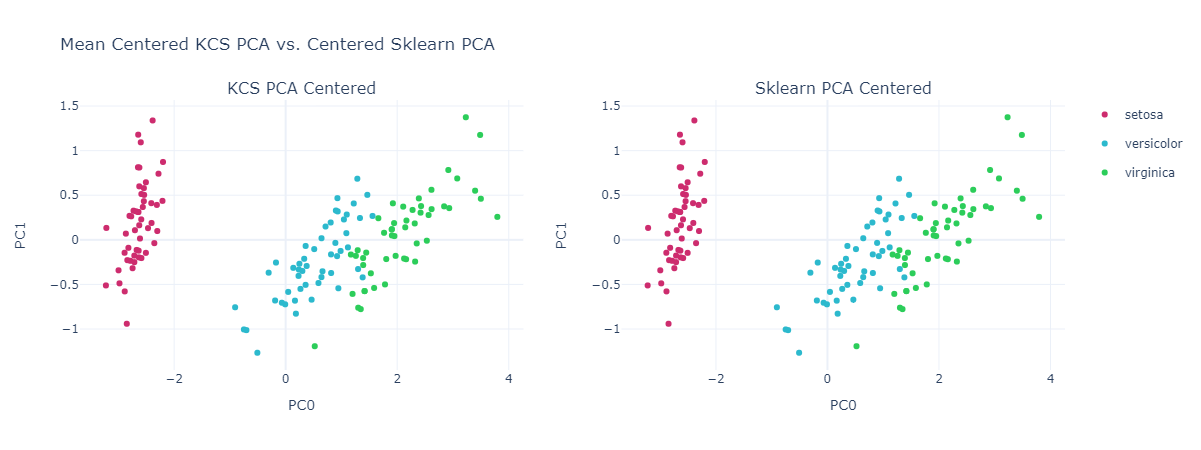

In [7]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['KCS PCA Centered', 'Sklearn PCA Centered'])

cmap ={'setosa': '#CD2C6E',
       'versicolor': '#2CB9CD', 
       'virginica': '#2CCD5A'}

for i, species in enumerate(df_kcs_pca_scaled.classes.unique()):   
    temp = df_kcs_pca_scaled[df_kcs_pca_scaled.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['PC0'], y=temp['PC1']*-1, mode='markers', name=species, legendgroup=species, marker=dict(color=cmap[species]), showlegend=True), row=1, col=1)
    
for i, species in enumerate(pca_sklearn_data.classes.unique()):   
    temp = pca_sklearn_data[pca_sklearn_data.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['PC0'], y=temp['PC1'], mode='markers', name=species, legendgroup=species, marker=dict(color=cmap[species]), showlegend=False), row=1, col=2)

fig.update_xaxes(title_text='PC0')
fig.update_yaxes(title_text='PC1')
fig.update_layout(template='plotly_white', title='Mean Centered KCS PCA vs. Centered Sklearn PCA ')
plotly.offline.iplot(fig, filename='temp.html')
   

#### Running kmeans on my data

In [8]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_kcs_pca_scaled.iloc[:, :-1])
df_kcs_pca_scaled['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

#### Running kmeans on sklearn pca

In [9]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(pca_sklearn_data.iloc[:, :-1])
pca_sklearn_data['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

#### Comparing Unscaled PCA

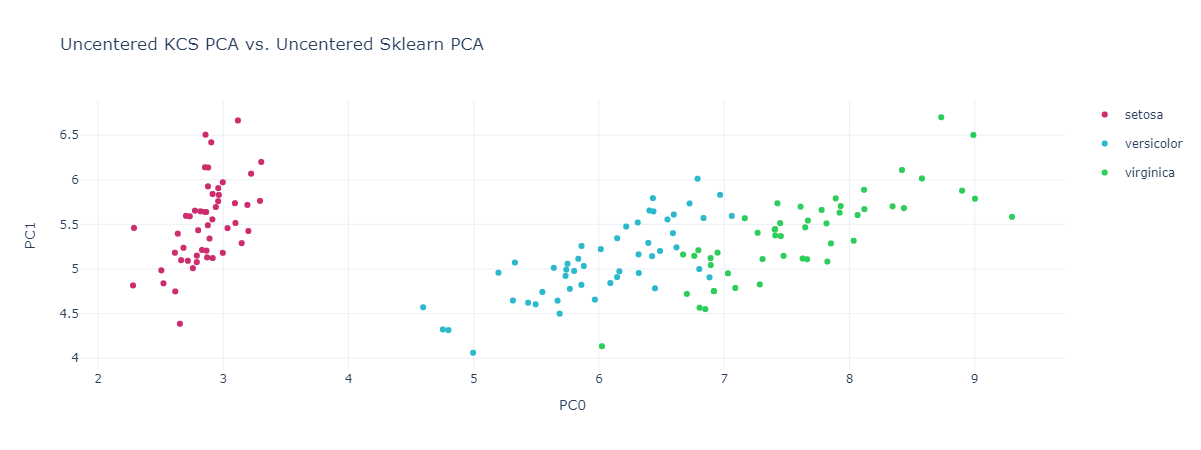

In [10]:
fig = go.Figure()

for i, species in enumerate(df_kcs_pca_unscaled.classes.unique()):   
    temp = df_kcs_pca_unscaled[df_kcs_pca_unscaled.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['PC0'], y=temp['PC1']*-1, mode='markers', name=species,
                            legendgroup=species, marker=dict(color=cmap[species]), showlegend=True))

fig.update_xaxes(title_text='PC0')
fig.update_yaxes(title_text='PC1')
fig.update_layout(template='plotly_white', title='Uncentered KCS PCA vs. Uncentered Sklearn PCA ')
plotly.offline.iplot(fig, filename='temp.html')

The largest difference I see when comparing uncentered pca data to centered pca data is that they range for the x and y axis increase significantly (over double). By uncentering the same relationships are still maintained but the range of the spread between points is increased.

PCA works well because it is a linear transformation. If these data has no underlying linearity then PCA will perform poorly. An example would be a spiral dataset.

### Question 2
- Using MDS plot (scatter plot) the same iris data set using 2 different metrics for the dissimilarity matrix: (cosine, manhattan) coloring by label.
- Run K-Means with k=2 on the output above and plot the results and color according to cluster.

In [11]:
# calculating manhattan distance matrix
man_dist = pairwise_distances(df.iloc[:, :-1], metric='manhattan')
# Running MDS for manhattan distances
mds_manhattan = MDS(dissimilarity='precomputed')
df_MDS_manhattan = pd.DataFrame(mds_manhattan.fit_transform(man_dist), columns=['MDS0', 'MDS1'])
df_MDS_manhattan['classes'] = df.classes

In [12]:
# calculating manhattan distance matrix
cos_dist = pairwise_distances(df.iloc[:, :-1], metric='cosine')
# Running MDS for manhattan distances
mds_cos = MDS(dissimilarity='precomputed')
df_MDS_cos = pd.DataFrame(mds_manhattan.fit_transform(cos_dist), columns=['MDS0', 'MDS1'])
df_MDS_cos['classes'] = df.classes

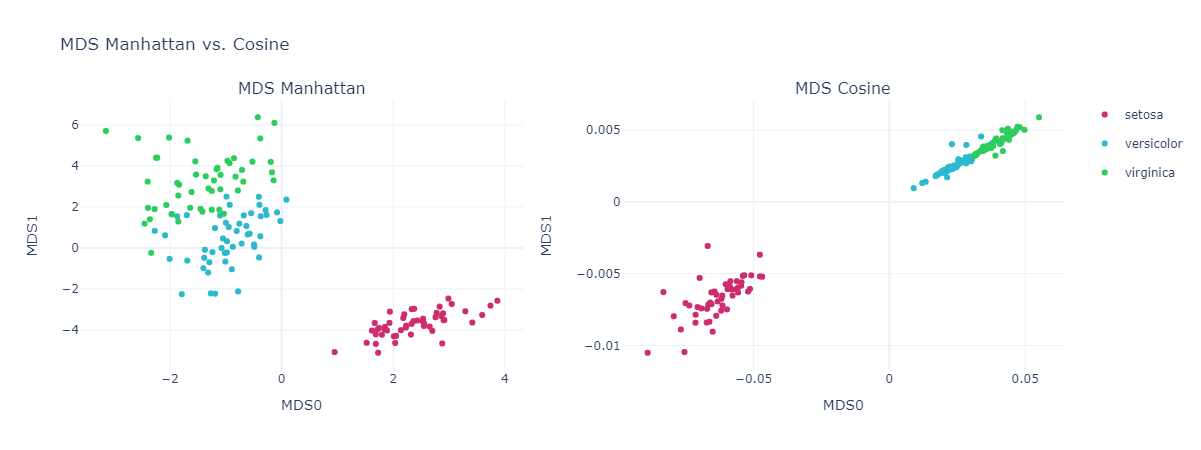

In [13]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['MDS Manhattan', 'MDS Cosine'])

for i, species in enumerate(df_MDS_manhattan.classes.unique()):   
    temp = df_MDS_manhattan[df_MDS_manhattan.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['MDS0'], y=temp['MDS1'], mode='markers', name=species,
                             legendgroup=species, marker=dict(color=cmap[species]), showlegend=True,), row=1, col=1)
    
for i, species in enumerate(df_MDS_cos.classes.unique()):   
    temp = df_MDS_cos[df_MDS_cos.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['MDS0'], y=temp['MDS1'], mode='markers', name=species,
                             legendgroup=species, marker=dict(color=cmap[species]), showlegend=False), row=1, col=2)

fig.update_xaxes(title_text='MDS0')
fig.update_yaxes(title_text='MDS1')
    
fig.update_layout(template='plotly_white', title='MDS Manhattan vs. Cosine')
plotly.offline.iplot(fig, filename='temp.html')

#### Running Kmeans of MDS data

In [14]:
# Running Kmeans on MDS manhattan
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_MDS_manhattan.iloc[:, :-1])
df_MDS_manhattan['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

In [15]:
# Running Kmeans on MDS cosine
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_MDS_cos.iloc[:, :-1])
df_MDS_cos['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

### Problem 3
- Using T-SNE plot (scatter plot) the same iris data set coloring by label.
- Run K-Means with k=2 on the output above, plot the results and color according to cluster.
- Compare and contrast the results from the plots generated from all 3 problems. Also, discuss any patterns or clusters that resulted from running the K-Means algorithm on all 3 problems.

In [16]:
# Running T-SNE
df_tsne = pd.DataFrame(TSNE().fit_transform(df.iloc[:, :-1]), columns=['TSNE0', 'TSNE1'])
df_tsne['classes'] = df.classes

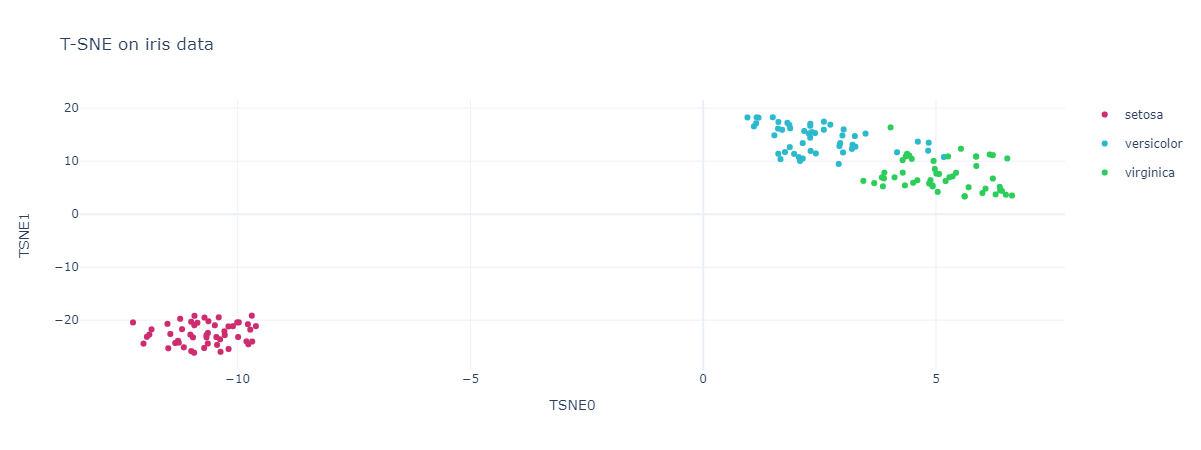

In [17]:
fig = go.Figure()

for i, species in enumerate(df_tsne.classes.unique()):   
    temp = df_tsne[df_tsne.classes == species].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['TSNE0'], y=temp['TSNE1'], mode='markers', name=species, legendgroup=species, marker=dict(color=cmap[species]), showlegend=True))

fig.update_xaxes(title_text='TSNE0')
fig.update_yaxes(title_text='TSNE1')
    
fig.update_layout(template='plotly_white', title='T-SNE on iris data')
plotly.offline.iplot(fig, filename='temp.html')

#### Running Kmeans on T-SNE 

In [18]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_tsne.iloc[:, :-1])
df_tsne['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

### This figure contains all of the Kmeans data for this assignment.

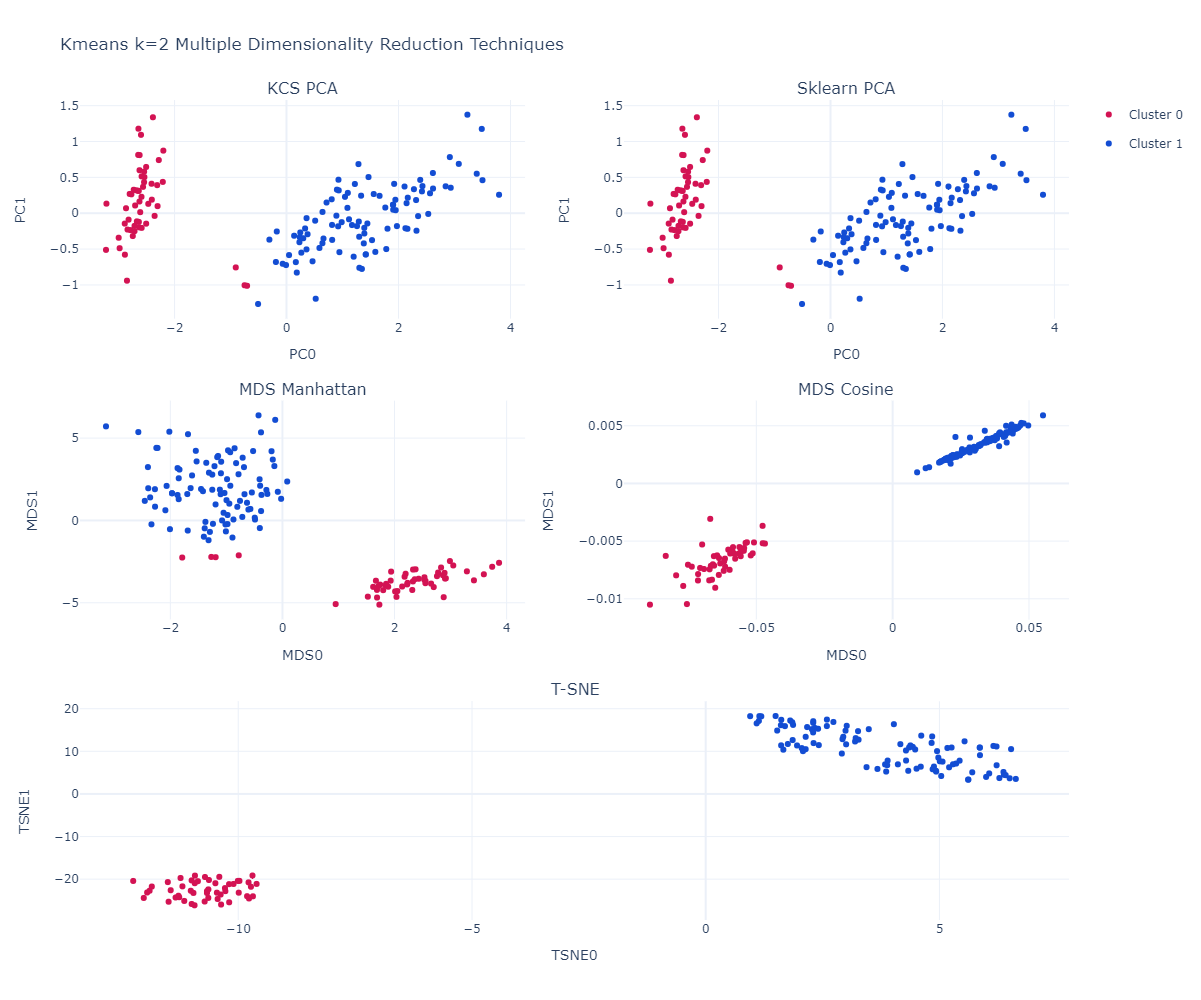

In [20]:
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=['KCS PCA', 'Sklearn PCA',
                                    'MDS Manhattan', 'MDS Cosine',
                                   'T-SNE'], vertical_spacing=0.1, horizontal_spacing=0.1,
                   specs=[[{}, {}],
                          [{}, {}], 
                          [{'rowspan':1, 'colspan':2}, None]])

cmap_clusters = {0: '#D31353',
                 1: '#134DD3',}

for i, cluster in enumerate(df_kcs_pca_scaled.kmeans_clusters.unique()):   
    temp = df_kcs_pca_scaled[df_kcs_pca_scaled.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['PC0'], y=temp['PC1']*-1, mode='markers', name=f"Cluster {cluster}",
                             legendgroup=f"{cluster}", marker=dict(color=cmap_clusters[cluster]), showlegend=True), row=1, col=1)
    
for i, cluster in enumerate(pca_sklearn_data.kmeans_clusters.unique()):   
    temp = pca_sklearn_data[pca_sklearn_data.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['PC0'], y=temp['PC1'], mode='markers', name=f"Cluster {cluster}", 
                             legendgroup=f"{cluster}", marker=dict(color=cmap_clusters[cluster]), showlegend=False), row=1, col=2)

for i, cluster in enumerate(df_MDS_manhattan.kmeans_clusters.unique()):   
    temp = df_MDS_manhattan[df_MDS_manhattan.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['MDS0'], y=temp['MDS1'], mode='markers', name=f"Cluster {cluster}", 
                             legendgroup=f"{cluster}", marker=dict(color=cmap_clusters[cluster]), showlegend=False), row=2, col=1)
    
for i, cluster in enumerate(pca_sklearn_data.kmeans_clusters.unique()):   
    temp = df_MDS_cos[df_MDS_cos.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['MDS0'], y=temp['MDS1'], mode='markers', name=f"Cluster {cluster}", 
                             legendgroup=f"{cluster}", marker=dict(color=cmap_clusters[cluster]), showlegend=False), row=2, col=2)
    
for i, cluster in enumerate(df_tsne.kmeans_clusters.unique()):   
    temp = df_tsne[df_tsne.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp['TSNE0'], y=temp['TSNE1'], mode='markers', name=f"Cluster {cluster}", 
                             legendgroup=f"{cluster}", marker=dict(color=cmap_clusters[cluster]), showlegend=False), row=3, col=1)

fig.update_xaxes(title_text='PC0', row=1, col=1)
fig.update_yaxes(title_text='PC1', row=1, col=1)
fig.update_xaxes(title_text='PC0', row=1, col=2)
fig.update_yaxes(title_text='PC1', row=1, col=2)
fig.update_xaxes(title_text='MDS0', row=2, col=1)
fig.update_yaxes(title_text='MDS1', row=2, col=1)
fig.update_xaxes(title_text='MDS0', row=2, col=2)
fig.update_yaxes(title_text='MDS1', row=2, col=2)
fig.update_xaxes(title_text='TSNE0', row=3, col=1)
fig.update_yaxes(title_text='TSNE1', row=3, col=1)
fig.update_layout(template='plotly_white', title='Kmeans k=2 Multiple Dimensionality Reduction Techniques', 
                  autosize=False, width = 1000, height=1000)
plotly.offline.iplot(fig, filename='temp.html')

All 3 dimensionality reduction techniques reduced these data dimensions to 2 with exception of PCA where the majority of the variance was found in the first PC (92%). I found this interesting because it separated versicolor and virginica from the setosa clearly. In the cases of MDS cosine and T-SNE, the clusters were able to separate distinctly thus helping kmeans clusters the two clusters properly. While using MDS with manhattan distance and PCA, Kmeans placed a cluster center further away from the from the denses region of points causing it to cluster a few points from cluster1 incorrectly. With that exception in mind it was interesting to see that the versicolor and virginica were grouped and clustered perfectly together while, the setosa grouping and cluster are clearly separated. This suggests that the setosa's wings are uniquely different from that of versicolor and virginica.

Something else I find interesting is the differece in the outputs between my and Sklearns PCA functions. They describe the same result, but in some cases, specifically in PC1, some of the negative and positive signs are exact opposite indicating that the Sklearn implementation differs from mine ever so slightly. I multiplied the eigenvectos by -1 to make my PCA look the same as the sklearn PCA.

Another observation I've made is that the shape of the groupings and how they change between the cosine and manhattan distance functions used for MDS. The cosine points appear to be more of a line/tight oval grouping, where as manhattan distance groupings are more blob like. This makes sense since a cosine is a wave/line like structure. The MDS Manhattan grouping shapes also looked quite similar to the output from PCA. I believe that makes sense since MDS is taking distances and applying them to a manhattan space, which is similar tot he euclidean space of PCA. Lastly, T-SNE defined the difference very well making more uniform blobs than MDS and PCA.